In [1]:
## AE Implementation (using a basic NN)
# Reference: https://blog.keras.io/building-autoencoders-in-keras.html
from keras.layers import Input, Dense
from keras.models import Model

encoding_dim = 32

input_img = Input(shape=(784,)) # 784 = 28x28 : Flatten
encoded = Dense(encoding_dim, activation='relu')(input_img) # Fully Connected
encoder = Model(input_img, encoded)

encoded_input = Input(shape=(encoding_dim,))
decoded = Dense(784, activation='sigmoid')(encoded_input) # sigmoid set result in range of 0~1
decoder = Model(encoded_input, decoded)

outputs = decoder(encoder(input_img))
autoencoder = Model(input_img, outputs)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy') # cross-entropy represents the 'dissimilarity' between probability distribution of the predicted and actual
# Usage of cross entropy :
# multi-class classification : Softmax + Categorical Cross-Entorpy
# multi-label classification : Sigmoid + BInary Cross-Entropy

In [6]:
# MNIST data importation
from keras.datasets import mnist
import numpy as np

(x_train, _), (x_test, _) = mnist.load_data()

x_train_n = x_train.astype('float32') / 255.
x_test_n = x_test.astype('float32') / 255.
x_train_n = x_train_n.reshape((x_train_n.shape[0], -1))
x_test_n = x_test_n.reshape((x_test_n.shape[0], -1))

# Model Training
hist = autoencoder.fit(x_train_n,  x_train_n,
                       epochs=50,
                       batch_size=256,
                       shuffle=True,
                       validation_data=(x_test_n, x_test_n))

11490434/11490434 [==============================] - 0s 0us/step
Epoch 1/50
235/235 [==============================] - 4s 15ms/step - loss: 0.2772 - val_loss: 0.1936
Epoch 2/50
235/235 [==============================] - 5s 21ms/step - loss: 0.1724 - val_loss: 0.1539
Epoch 3/50
235/235 [==============================] - 2s 10ms/step - loss: 0.1446 - val_loss: 0.1337
Epoch 4/50
235/235 [==============================] - 3s 11ms/step - loss: 0.1284 - val_loss: 0.1208
Epoch 5/50
235/235 [==============================] - 3s 11ms/step - loss: 0.1177 - val_loss: 0.1122
Epoch 6/50
235/235 [==============================] - 3s 12ms/step - loss: 0.1107 - val_loss: 0.1067
Epoch 7/50
235/235 [==============================] - 3s 13ms/step - loss: 0.1057 - val_loss: 0.1023
Epoch 8/50
235/235 [==============================] - 3s 11ms/step - loss: 0.1020 - val_loss: 0.0993
Epoch 9/50
235/235 [==============================] - 3s 11ms/step - loss: 0.0994 - val_loss: 0.0970
Epoch 10/50
235/235 [=====

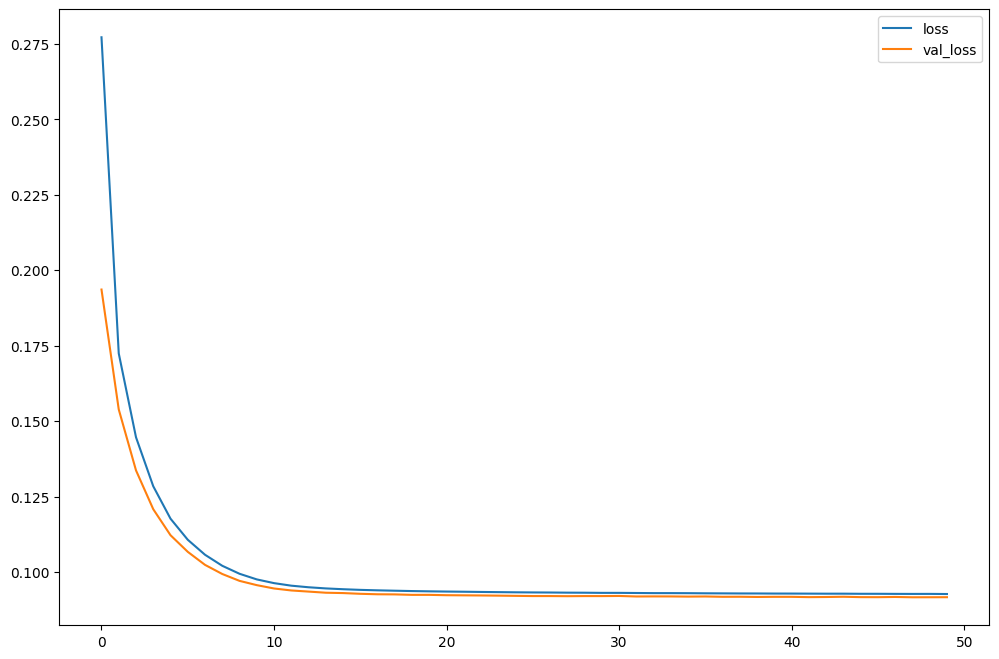

In [8]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,8))
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.legend(['loss', 'val_loss'])
plt.show()

313/313 [==============================] - 1s 2ms/step


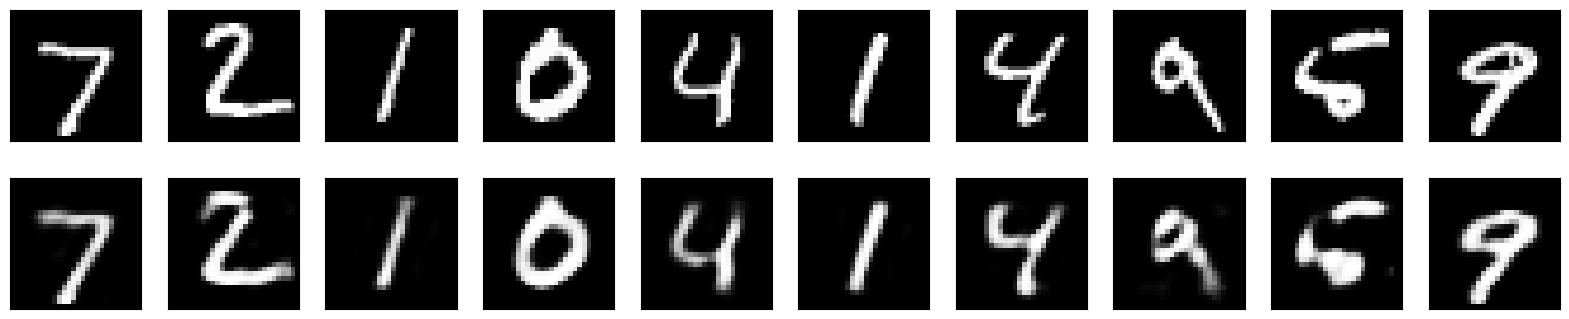

In [9]:
# encodeing and decoding
encoded_imgs = encoder.predict(x_test_n)
decoded_imgs = decoder.predict(encoded_imgs)

# Plotting the result
n = 10  # how many digits we will display
plt.figure(figsize=(20,4))
for i in range(n):
  ax = plt.subplot(2, n, i+1)
  plt.imshow(x_test[i].reshape(28,28))
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)

  ax = plt.subplot(2, n, i+1+n)
  plt.imshow(decoded_imgs[i].reshape(28,28))
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)
plt.show()

In [11]:
## AE Implementation (using a basic CNN)
from keras import layers
from keras.datasets import mnist
from keras.models import Model

input = layers.Input(shape=(28,28,1))

# encoder
y1 = layers.Conv2D(32, (3,3), activation='relu', padding='same')(input)
y2 = layers.MaxPooling2D((2,2), padding='same')(y1)
y3 = layers.Conv2D(32, (3,3), activation='relu', padding='same')(y2)
y4 = layers.MaxPooling2D((2,2), padding='same')(y3)
y5 = layers.Flatten()(y4)
y = layers.Dense(32)(y5)

# decoder
z1 = layers.Dense(1568)(y)
z2 = layers.Reshape((7,7,32))(z1)
z3 = layers.Conv2DTranspose(32, (3,3), strides=2, activation='relu', padding='same')(z2)
z4 = layers.Conv2DTranspose(32, (3,3), strides=2, activation='relu', padding='same')(z3)
z = layers.Conv2D(1, (3,3), activation='sigmoid', padding='same')(z4)

# Autoencoder
autoencoder = Model(input, z)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')
autoencoder.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 14, 14, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 7, 7, 32)          0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 1568)              0   

In [12]:
def preprocess(array):
  array = array.astype("float32") / 255.
  array = array.reshape((array.shape[0], 28, 28, 1))
  return array

# MNIST data importation
(train_data, _), (test_data, _) = mnist.load_data()

# Normalize and reshape the data
train_data_n = preprocess(train_data)
test_data_n = preprocess(test_data)

# Training
hist = autoencoder.fit(x=train_data_n, y=train_data_n,
                       epochs=2,
                       batch_size=128,
                       shuffle=True,
                       validation_data=(test_data_n, test_data_n))

Epoch 1/2
469/469 [==============================] - 139s 293ms/step - loss: 0.1800 - val_loss: 0.0973
Epoch 2/2
469/469 [==============================] - 135s 288ms/step - loss: 0.0894 - val_loss: 0.0830


313/313 [==============================] - 6s 19ms/step


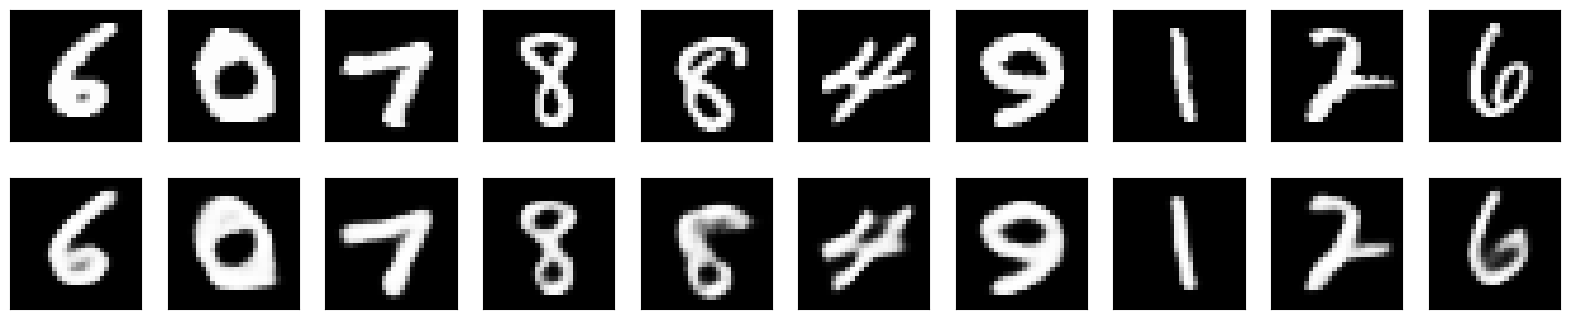

In [14]:
def display(array1, array2):
  # display 'n' random images from each one of the supplied arrays
  n = 10
  indices = np.random.randint(len(array1), size=n)
  images1 = array1[indices, :]
  images2 = array2[indices, :]
  plt.figure(figsize=(20,4))
  for i, (image1, image2) in enumerate(zip(images1, images2)):
    ax = plt.subplot(2, n, i+1)
    plt.imshow(image1.reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    ax = plt.subplot(2, n, i+1+n)
    plt.imshow(image2.reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
  plt.show()

# Plotting the result
predictions = autoencoder.predict(test_data_n)
display(test_data, predictions)

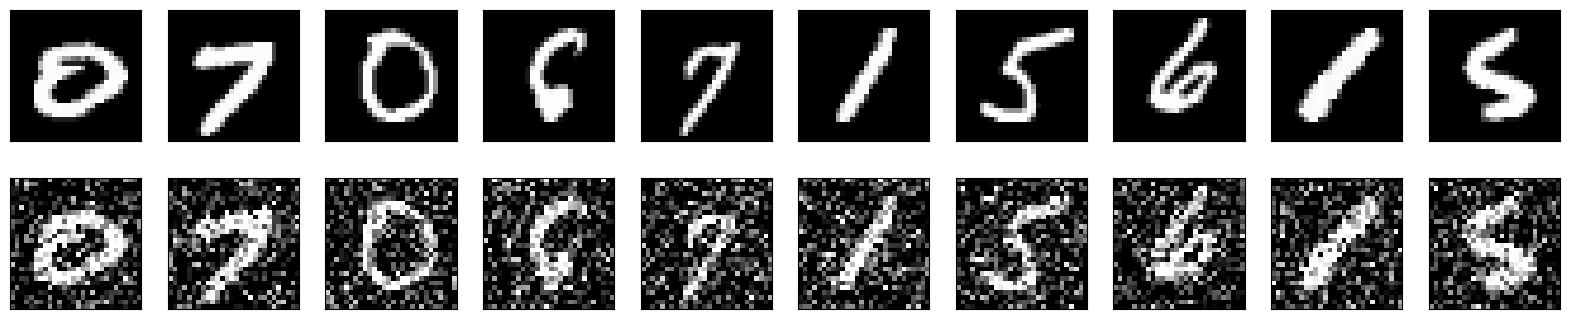

In [16]:
## AE Application: Denoising

def noise(array):
  # Adds random noise to each image in the supplied array
  noise_factor = 0.4
  noisy_array = array + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=array.shape)
  return np.clip(noisy_array, 0.0, 1.0)

(train_data, _), (test_data, _) = mnist.load_data()

# Normalize and resahpe
train_data_n = preprocess(train_data)
test_data_n = preprocess(test_data)

# Add noise
train_noisy = noise(train_data_n)
test_noisy = noise(test_data_n)

# Display the train data and a version of it with added noise
display(train_data_n, train_noisy)

In [17]:
# Training with Noisy Data as Input and Original Data as Output
hist = autoencoder.fit(x=train_noisy, y=train_data_n,
                       epochs=2,
                       batch_size=128,
                       shuffle=True,
                       validation_data=(test_noisy, test_data_n))

Epoch 1/2
469/469 [==============================] - 153s 327ms/step - loss: 0.1050 - val_loss: 0.0980
Epoch 2/2
469/469 [==============================] - 133s 283ms/step - loss: 0.0971 - val_loss: 0.0948


313/313 [==============================] - 7s 22ms/step


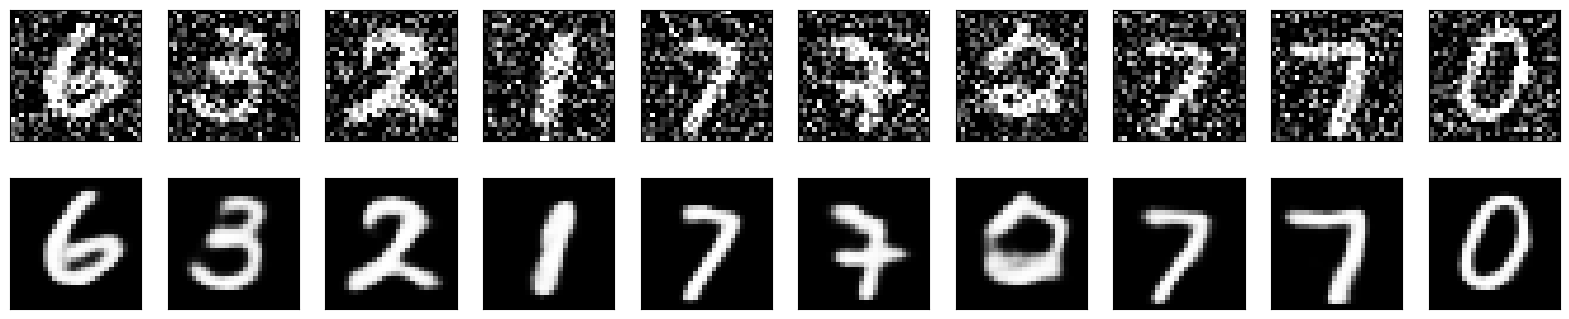

In [18]:
# Plotting the result
predictions = autoencoder.predict(test_noisy)
display(test_noisy, predictions)